# Lead scoring casestudy
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing data

In [1]:
# Imported required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file
Lead_df=pd.read_csv(r"C:\Users\komaltamboli\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
Lead_df.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleansing

In [6]:
# Checking null values
(Lead_df.isnull().sum())/len(Lead_df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Observation
1. There are some columns which having more than 40% null values. Therefore dropping these columns
2. There are some unwanted columns that are not needed in the model. Hence dropping these columns.

In [7]:
Lead_df.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine','How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [8]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,Interested in other courses,Low in Relevance,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Will revert after reading the email,Might be,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,Ringing,Not Sure,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,Will revert after reading the email,Might be,02.Medium,01.High,15.0,18.0,No,Modified


Now, it has noticed that there are some column contains 'Select' category which means that students did not select this option. Hence we will have to fill those value as nan.

In [9]:
# Identify columns contain Select category
category=[]
for i in Lead_df.columns:
    if len(Lead_df[i].isin(['Select']).unique())>1:
        category.append(i)
        
category        

['Specialization']

In [10]:
# Replace 'Select' category with null values
for i in category:
    Lead_df[i] = Lead_df[i].replace('Select',np.nan)
Lead_df.head()    

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,Low in Relevance,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Will revert after reading the email,Might be,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,Ringing,Not Sure,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,Will revert after reading the email,Might be,02.Medium,01.High,15.0,18.0,No,Modified


In [11]:
# Dropping columns where missing values more than 40%
Lead_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1, inplace = True)

We have to impute values for columns having missing values less than 40%

In [12]:
# Missing value Imputation
Lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# In Lead Source columns, there are few categories values count are less. so, we creted new category 'Other' and added these columns it.
Lead_df['Lead Source'] = Lead_df['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release', 'Social Media',
                          'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')
Lead_df['Lead Source'] = Lead_df['Lead Source'].replace('google','Google')

In [14]:
#Impute all null values with max occuring value i.e Google 
Lead_df['Lead Source'].replace(np.nan,'Google',inplace =True)
Lead_df['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64

In [15]:
# Dealing with specialisation
Lead_df['Specialization'].isna().sum()

3380

In Specialization column,there are 3380 rows having null values, replacing with 'Missing'.

In [16]:
# Replace null value with 'Missing'
Lead_df['Specialization']= Lead_df['Specialization']. replace(np.nan,'Missing')
Lead_df['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
# Dealing with 'What is your current occupation'
Lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
# Check null values in 'What is your current occupation' columns
Lead_df['What is your current occupation'].isna().sum()

2690

here missing values count is high. Imputing with median values will misleading information. Adding new categories as 'Missing'.


In [19]:
# Replace null values from 'What is your current occupation' columns with 'Missing'
Lead_df['What is your current occupation'].replace(np.nan,'Missing',inplace=True)
Lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Dealing with 'What matters most to you in choosing a course' columns
Lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Check the null values in 'What matters most to you in choosing a course'
Lead_df['What matters most to you in choosing a course'].isna().sum()

2709

data is highly skewed in above column and null values count is high. So, better we have to drop these columns.

In [22]:
Lead_df.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [23]:
# Dealing with 'TotalVisits', 'Page Views Per Visit','Last Activity','Tags'
miss_max = ['TotalVisits','Page Views Per Visit','Last Activity','Tags']

for i in miss_max:
    print(i,' : ', Lead_df[i].isna().sum())

TotalVisits  :  137
Page Views Per Visit  :  137
Last Activity  :  103
Tags  :  3353


In [24]:
# Impute all missing values with max occurance values
for i in Lead_df[miss_max].columns:
    max_str = Lead_df[i].value_counts()[Lead_df[i].value_counts() == Lead_df[i].value_counts().max()].index[0]
    Lead_df[i] = Lead_df[i].fillna(value=max_str)

In [25]:
# Check is there any null values present in columns
Lead_df['TotalVisits'].isna().sum()
Lead_df['Page Views Per Visit'].isna().sum()
Lead_df['Last Activity'].isna().sum()
Lead_df['Tags'].isna().sum()

0

In [26]:
# checking if any more null values in any columns
Lead_df.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Step 4: EDA (Exploratory data analysis)

Tried to understand data based on each column effects on conversion rate

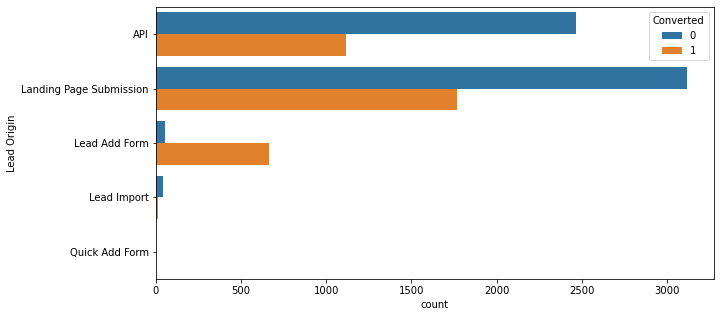

In [27]:
#Understanding Lead Conversion and Lead Origin
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=Lead_df)
plt.show()

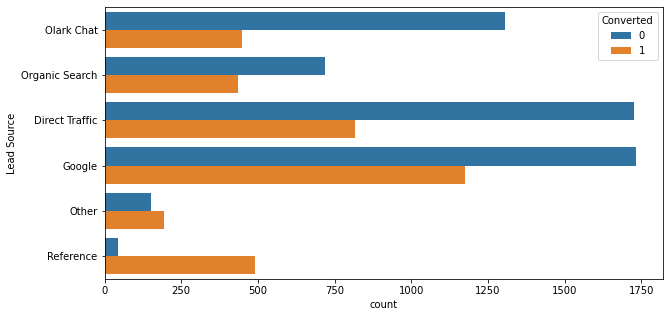

In [28]:
#Understanding Lead Conversion and Lead Source
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Source", hue="Converted", data=Lead_df)
plt.show()

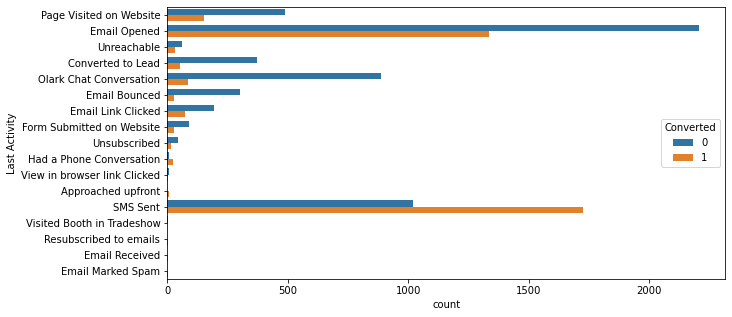

In [29]:
#Understanding Lead Conversion and Last Activity
plt.figure(figsize=(10, 5))
sns.countplot(y="Last Activity", hue="Converted", data=Lead_df)
plt.show()

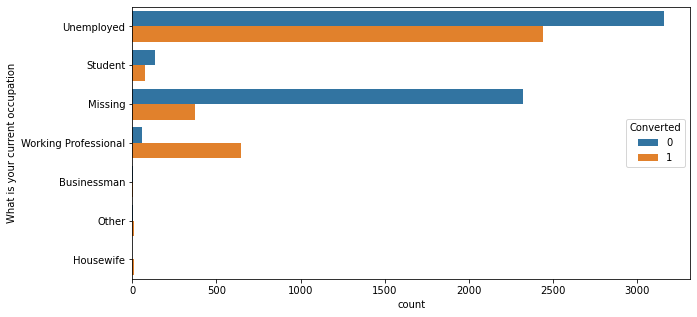

In [30]:
#Understanding Lead Conversion and Last Activity
plt.figure(figsize=(10, 5))
sns.countplot(y="What is your current occupation", hue="Converted", data=Lead_df)
plt.show()

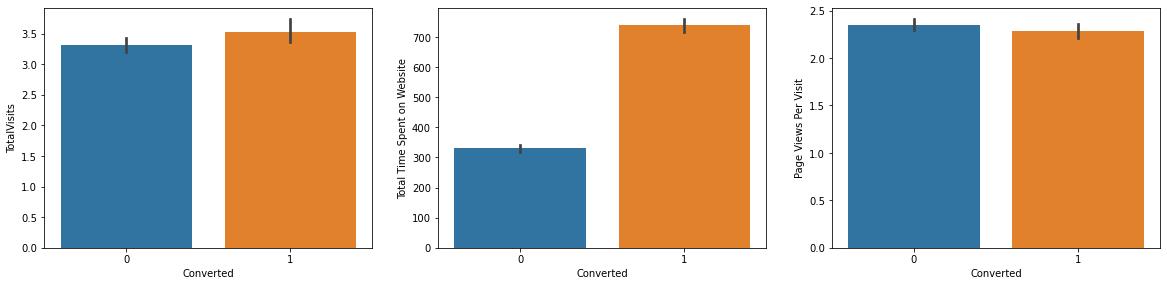

In [31]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = Lead_df)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = Lead_df)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = Lead_df)

plt.show()

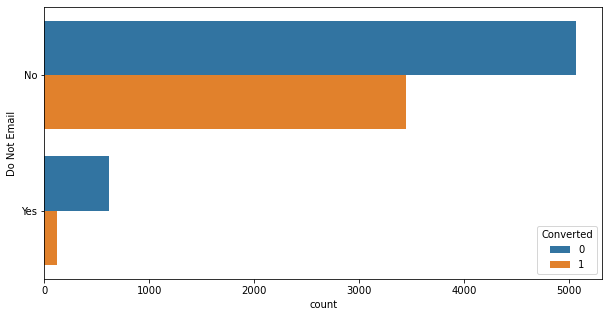

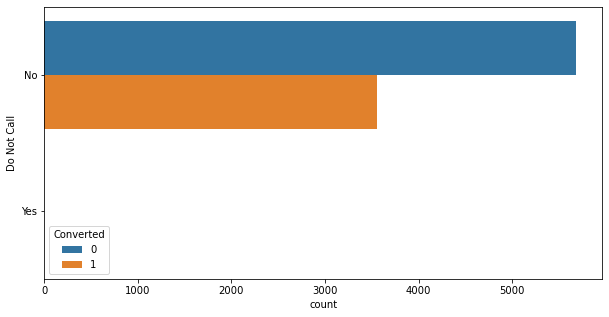

In [32]:
#Understanding Lead Conversion and Do Not Email and Do Not Call 
plt.figure(figsize=(10, 5))
sns.countplot(y="Do Not Email", hue="Converted", data=Lead_df)

plt.figure(figsize=(10, 5))
sns.countplot(y="Do Not Call", hue="Converted", data=Lead_df)
plt.show()

#### Observation came out from EDA
1. Maximum lead conversion happened from Landing Page submission.
2. Maximum users used Google browser for lead conversion.
3. Major lead conversion are from the unemployment group.
4. Major lead conversion happened from Do Not Email.

There are few columns contain Yes/No value, have to convert it into 1/0

In [33]:
# Dealing with yes/ No values
yes_no = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

for i in yes_no:
    Lead_df[i]=Lead_df[i].map({'Yes':1, 'No':0})
    
Lead_df.head(20)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified
5,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,Missing,Missing,0,0,0,0,0,0,Will revert after reading the email,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified
7,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,Missing,Missing,0,0,0,0,0,0,Will revert after reading the email,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.00,Email Opened,IT Projects Management,Missing,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
9,API,Google,0,0,0,4.0,58,4.00,Email Opened,Finance Management,Missing,0,0,0,0,0,0,Will revert after reading the email,0,Email Opened


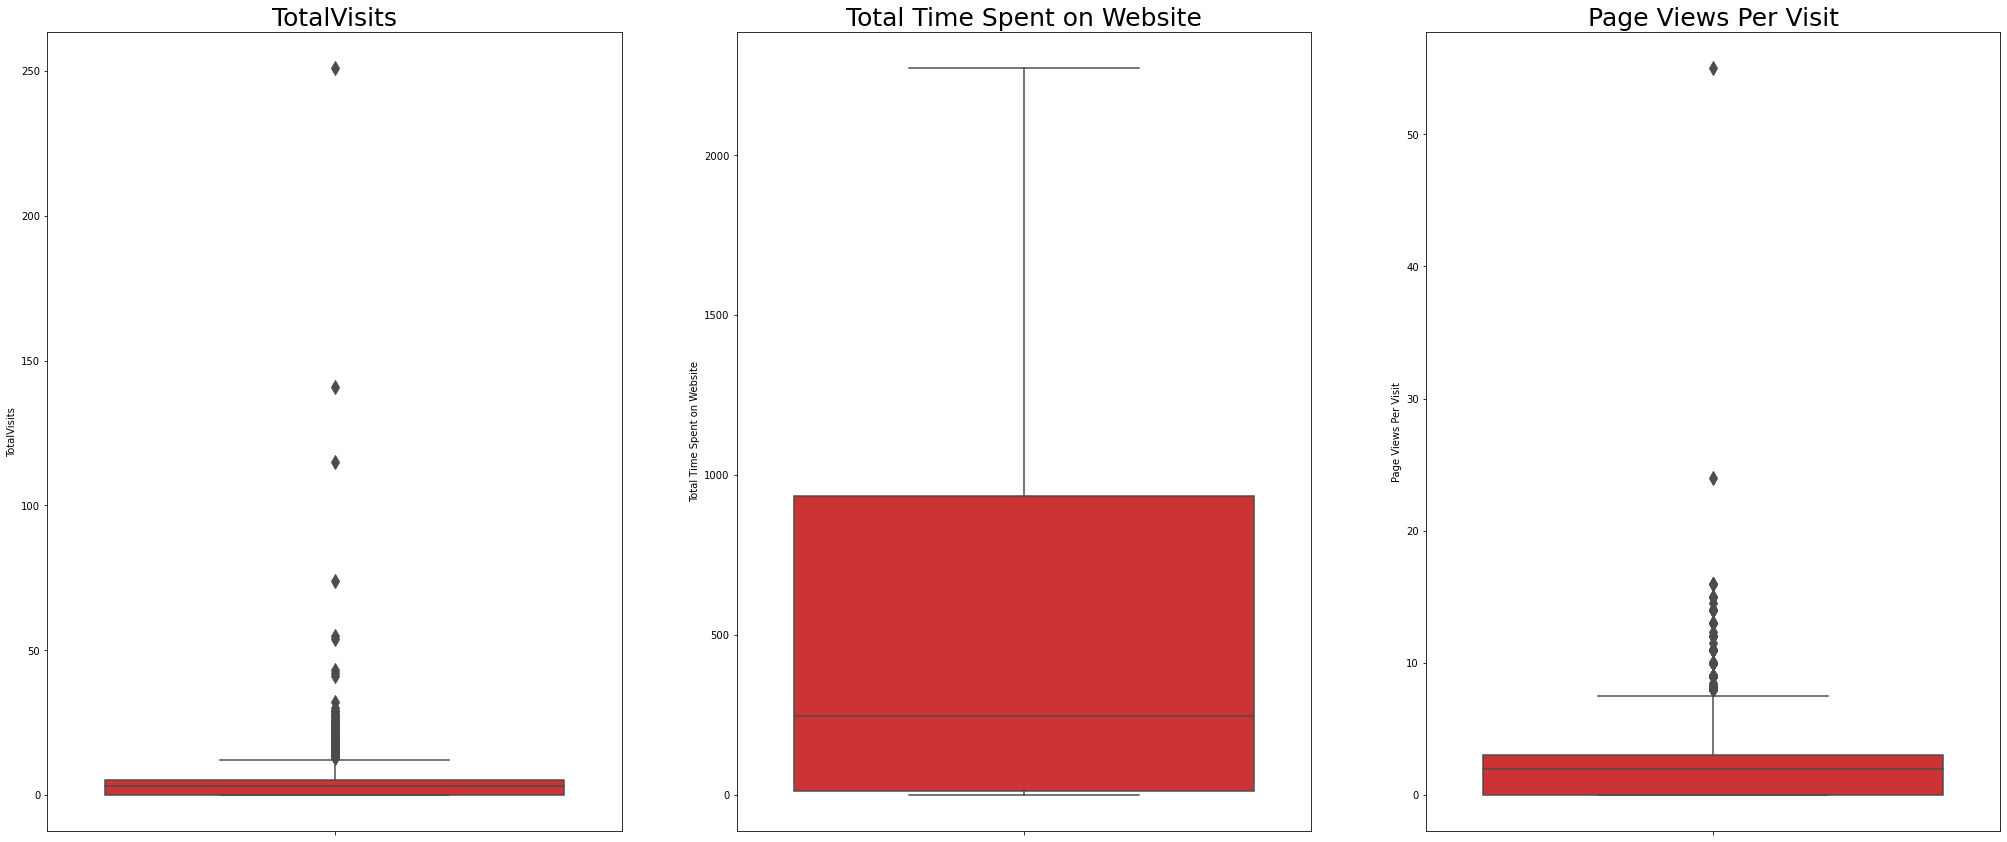

In [34]:
# Checked are there outliers present in 'TotalVisits' and 'Page Views Per Visit'
plt.figure(figsize=(35,50))

# Title names for the columns in the dataset

col_title={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col_title[i],fontsize=25)
    sns.boxplot(y=Lead_df[col_title[i]],data=Lead_df,palette='Set1',fliersize=10)

It is observed that there are two outlier variables present in the dataset.

In [35]:
# dropping redundant column

redundant=['Last Activity', 'Tags', 'Last Notable Activity']

Lead_df=Lead_df.drop(redundant,axis=1)


In [36]:
Lead_df.shape

(9240, 17)

In [37]:
# Creating Dummy variable and dropping first
cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']
dummy = pd.get_dummies(Lead_df[cat], drop_first=True)


In [38]:
# Adding these dummies to our original dataset
Lead_df = pd.concat([Lead_df,dummy],axis=1)

#dropping the duplicate columns
Lead_df = Lead_df.drop(cat, axis=1)

Lead_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Step 5 : Data Preparation

In [39]:
# X is feature variables and y is target variables
y=Lead_df['Converted']
X= Lead_df.drop('Converted', axis=1)

In [40]:
# Splitting data set into train-test 
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


In [41]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (7392, 43)
X_test: (1848, 43)
y_train: (7392,)
y_test: (1848,)


#### Step 6: Features standardization

In [42]:
# creating an object of standard scaler
scaler=StandardScaler()

In [43]:
# Now, Scaled  'Total Time Spent on Website' variables with standard scaler and fitting on X_train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,7392.000000,7392.000000,7.392000e+03,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,...,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,0.079140,0.000271,2.972310e-17,0.001623,0.000271,0.000135,0.000135,0.000541,0.000947,0.311959,...,0.007846,0.004600,0.036932,0.021645,0.001218,0.293019,0.001353,0.020427,0.605655,0.077516
std,0.269975,0.016448,1.000068e+00,0.040261,0.016448,0.011631,0.011631,0.023257,0.030760,0.463324,...,0.088237,0.067669,0.188607,0.145531,0.034874,0.455178,0.036758,0.141467,0.488743,0.267427
min,0.000000,0.000000,-8.849416e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.629642e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-4.344041e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,8.073214e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,3.276121e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# Checked conversion rate
print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 38.54


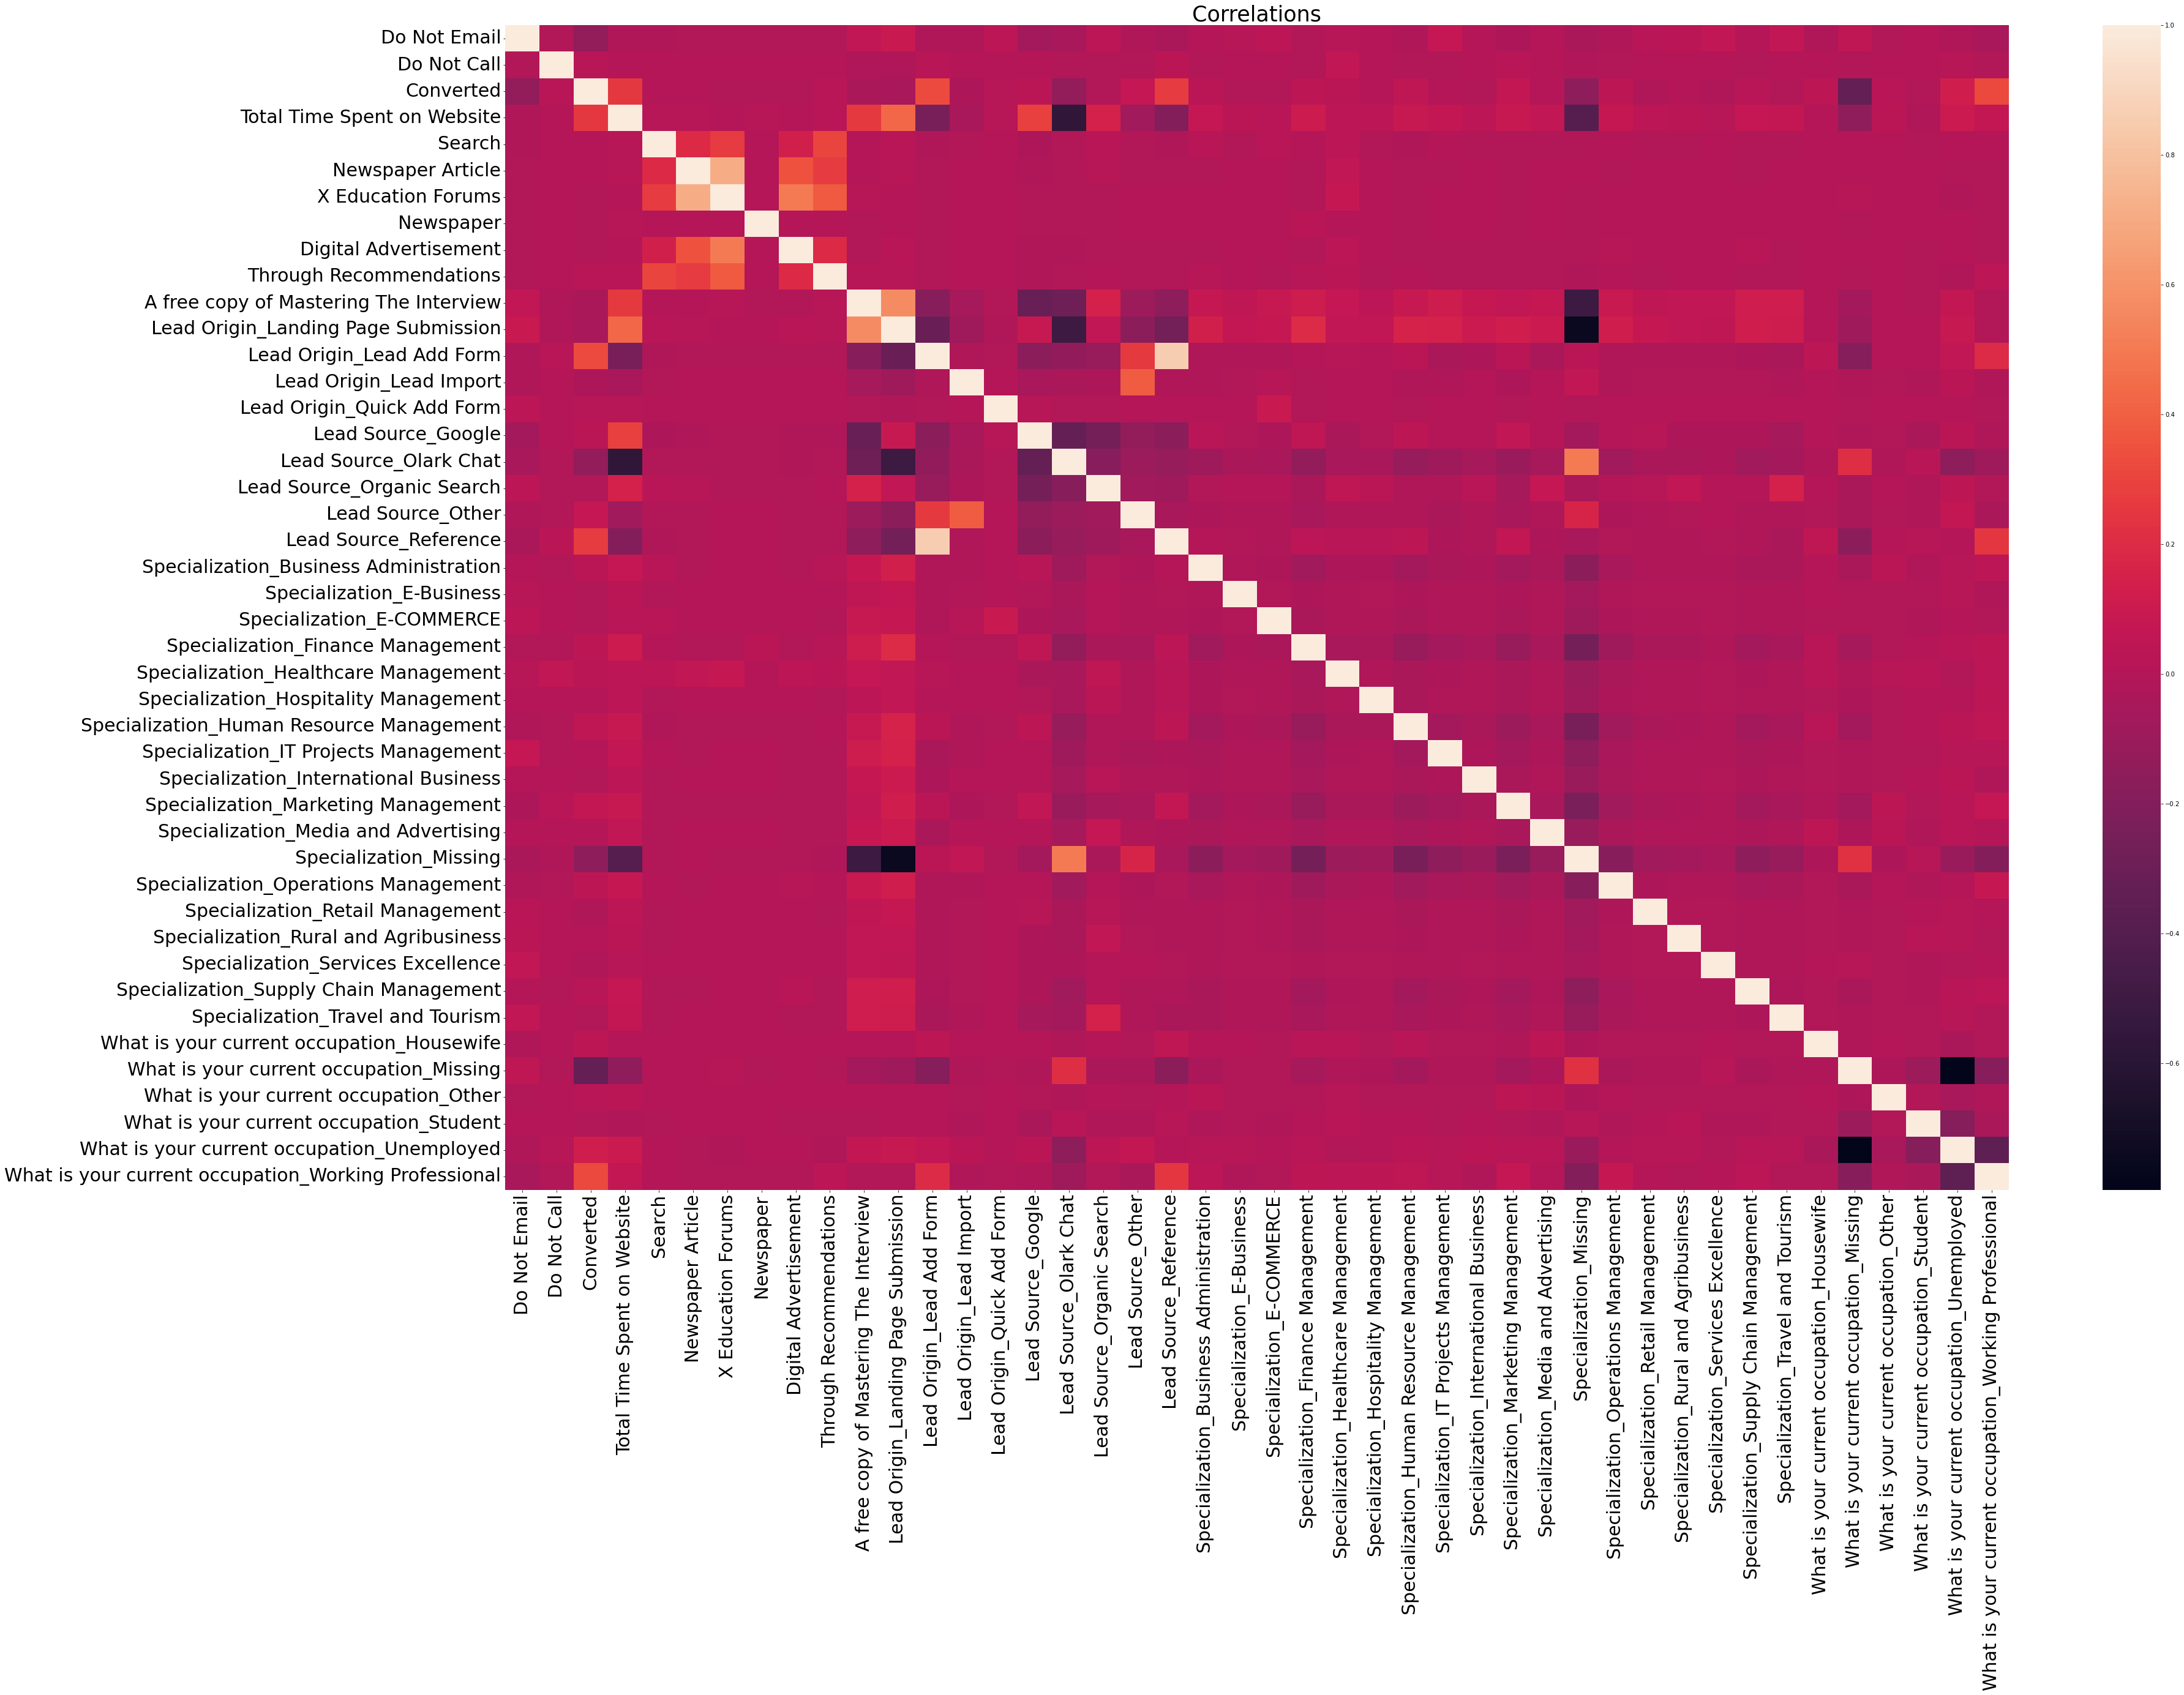

In [45]:
# To check the correlation between variables
plt.figure(figsize=(55,35))
sns.heatmap(Lead_df.corr(method='spearman'))
plt.title('Correlations', fontsize =35)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

#### Step7: Building a model

In [46]:
# Created logistic regression object
logreg = LogisticRegression()

In [47]:
# RFE model with 15 variables
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [48]:
# Listing which columns are selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 27),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 11),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 14),
 ('Through Recommendations', False, 12),
 ('A free copy of Mastering The Interview', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Other', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 25),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 28),
 ('Specialization_Healthcare Management', False, 26),
 ('Specialization_Hospitality Manage

In [49]:
# storing selected(True) columns by RFE in a list
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper Article',
       'Newspaper', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Specialization_Hospitality Management',
       'Specialization_Missing', 'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Missing',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [50]:
# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Other',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current o

In [51]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper Article,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Specialization_Hospitality Management,Specialization_Missing,Specialization_Retail Management,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Working Professional
7263,0,-0.884942,0,0,0,0,1,0,0,1,0,0,0,0,0
6468,0,-0.632201,0,0,1,0,0,0,0,0,0,0,0,0,0
7833,0,-0.740257,0,0,1,0,0,0,0,0,0,0,0,0,0
4461,0,2.006923,0,0,1,0,0,0,0,0,0,0,0,0,0
8453,0,-0.884942,0,0,0,0,1,0,0,1,0,0,0,0,0


#### Model 1

In [52]:
X_train_sm_1 = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3262.8
Date:                Sun, 18 Jun 2023   Deviance:                       6525.6
Time:                        07:59:38   Pearson chi2:                 8.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3611
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0005      0.109      0.004      0.997      -0.213       0.214
Do Not Email                                            -1.3661      0.151     -9.053      0.000      -1.662      -1.070
Total Time Spent on Website                              1.0938      0.036     30.432      0.000       1.023       1.164
Newspaper Article                                        0.9376      1.437      0.652      0.514      -1.880       3.755
Newspaper                                              -24.4745   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                     -0.7540      0.113     -6.653      0.000      -0.976      -0.532
Lead Origin_Lead Add Form                                4.5800      0.364     12.584      0.000       3.867       5.293
Lead Source_Olark Chat                                   0.9143      0.107      8.584      0.000       0.706       1.123
Lead Source_Reference                                   -1.3628      0.400     -3.408      0.001      -2.147      -0.579
Specialization_Hospitality Management                   -0.8330      0.296     -2.818      0.005      -1.412      -0.254
Specialization_Missing                                  -0.8819      0.110     -8.053      0.000      -1.097      -0.667
Specialization_Retail Management                        -0.3861      0.301     -1.281      0.200      -0.977       0.204
What is your current occupation_Housewife               22.2655   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.1943      0.078    -15.257      0.000      -1.348      -1.041
What is your current occupation_Other                   -0.5165      0.707     -0.731      0.465      -1.902       0.869
What is your current occupation_Working Professional     2.4297      0.172     14.119      0.000       2.092       2.767
========================================================================================================================
"""

In [53]:
vif=pd.DataFrame()
# adding same features as the x_train dataset have
vif['Features']=X_train_rfe[col].columns  
# Caculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_rfe[col].values,i) for i in range(X_train_rfe[col].shape[1])]


In [54]:
# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)
vif   # Viewing the dataset

,Features,VIF
5,Lead Origin_Lead Add Form,4.42
7,Lead Source_Reference,4.26
9,Specialization_Missing,2.03
6,Lead Source_Olark Chat,1.86
12,What is your current occupation_Missing,1.60
4,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.23
14,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
8,Specialization_Hospitality Management,1.02


There are a few variables with high P-value. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'const' and 'What is your current occupation_Housewife' has the highest p-value. So let's start by dropping that.

#### Model 2

In [55]:

X_train_rfe2 = X_train_sm_1.drop(['const','What is your current occupation_Housewife'],axis=1)

# Creating a new model 2

X_train_sm_2=sm.add_constant(X_train_rfe2)                                
logr2=sm.GLM(y_train,X_train_sm_2,family=sm.families.Binomial()).fit()     
logr2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3267.5
Date:                Sun, 18 Jun 2023   Deviance:                       6535.0
Time:                        07:59:38   Pearson chi2:                 8.95e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3603
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0033      0.109      0.031      0.976      -0.210       0.217
Do Not Email                                            -1.3695      0.151     -9.076      0.000      -1.665      -1.074
Total Time Spent on Website                              1.0933      0.036     30.434      0.000       1.023       1.164
Newspaper Article                                        0.9348      1.437      0.650      0.515      -1.882       3.752
Newspaper                                              -22.4789   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.7511      0.113     -6.630      0.000      -0.973      -0.529
Lead Origin_Lead Add Form                                4.5799      0.364     12.582      0.000       3.867       5.293
Lead Source_Olark Chat                                   0.9140      0.107      8.582      0.000       0.705       1.123
Lead Source_Reference                                   -1.3541      0.400     -3.386      0.001      -2.138      -0.570
Specialization_Hospitality Management                   -0.8372      0.296     -2.832      0.005      -1.417      -0.258
Specialization_Missing                                  -0.8843      0.109     -8.076      0.000      -1.099      -0.670
Specialization_Retail Management                        -0.3903      0.301     -1.295      0.195      -0.981       0.200
What is your current occupation_Missing                 -1.1969      0.078    -15.294      0.000      -1.350      -1.043
What is your current occupation_Other                   -0.5206      0.707     -0.737      0.461      -1.906       0.865
What is your current occupation_Working Professional     2.4253      0.172     14.093      0.000       2.088       2.763
========================================================================================================================
"""

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.42
7,Lead Source_Reference,4.25
9,Specialization_Missing,2.03
6,Lead Source_Olark Chat,1.86
11,What is your current occupation_Missing,1.60
4,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.23
13,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
8,Specialization_Hospitality Management,1.02


#### Model 3

In [57]:
# Dropping the most insignificant values 'Specialization_Missing' and constant

X_train_rfe3 = X_train_sm_2.drop(['const','Specialization_Missing'],1)

# Creating a new model 3

X_train_sm_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_sm_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.7
Date:                Sun, 18 Jun 2023   Deviance:                       6601.3
Time:                        07:59:39   Pearson chi2:                 8.44e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3545
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6653      0.070     -9.493      0.000      -0.803      -0.528
Do Not Email                                            -1.3913      0.150     -9.245      0.000      -1.686      -1.096
Total Time Spent on Website                              1.1136      0.036     31.073      0.000       1.043       1.184
Newspaper Article                                        0.5381      1.540      0.349      0.727      -2.481       3.557
Newspaper                                              -22.5095   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.1014      0.079     -1.290      0.197      -0.256       0.053
Lead Origin_Lead Add Form                                4.4570      0.362     12.296      0.000       3.747       5.167
Lead Source_Olark Chat                                   0.8926      0.104      8.577      0.000       0.689       1.097
Lead Source_Reference                                   -0.9700      0.396     -2.451      0.014      -1.746      -0.194
Specialization_Hospitality Management                   -0.6959      0.290     -2.398      0.016      -1.265      -0.127
Specialization_Retail Management                        -0.2965      0.301     -0.986      0.324      -0.886       0.293
What is your current occupation_Missing                 -1.2816      0.077    -16.558      0.000      -1.433      -1.130
What is your current occupation_Other                   -0.3781      0.683     -0.553      0.580      -1.717       0.961
What is your current occupation_Working Professional     2.5688      0.169     15.172      0.000       2.237       2.901
========================================================================================================================
"""

In [58]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,Lead Source_Reference,4.16
5,Lead Origin_Lead Add Form,4.11
10,What is your current occupation_Missing,1.41
4,Lead Origin_Landing Page Submission,1.36
6,Lead Source_Olark Chat,1.35
1,Total Time Spent on Website,1.22
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
8,Specialization_Hospitality Management,1.02
9,Specialization_Retail Management,1.02


#### Model 4

In [59]:
# Dropping the most insignificant values 'Newspaper' and constant

X_train_rfe4 = X_train_sm_3.drop(['const','Newspaper'],1)

# Creating a new model 3

X_train_sm_4=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr4=sm.GLM(y_train,X_train_sm_4,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr4.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.7
Date:                Sun, 18 Jun 2023   Deviance:                       6601.3
Time:                        07:59:39   Pearson chi2:                 8.44e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3545
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6653      0.070     -9.493      0.000      -0.803      -0.528
Do Not Email                                            -1.3913      0.150     -9.245      0.000      -1.686      -1.096
Total Time Spent on Website                              1.1136      0.036     31.073      0.000       1.043       1.184
Newspaper Article                                        0.5381      1.540      0.349      0.727      -2.481       3.557
Newspaper                                              -22.5095   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.1014      0.079     -1.290      0.197      -0.256       0.053
Lead Origin_Lead Add Form                                4.4570      0.362     12.296      0.000       3.747       5.167
Lead Source_Olark Chat                                   0.8926      0.104      8.577      0.000       0.689       1.097
Lead Source_Reference                                   -0.9700      0.396     -2.451      0.014      -1.746      -0.194
Specialization_Hospitality Management                   -0.6959      0.290     -2.398      0.016      -1.265      -0.127
Specialization_Retail Management                        -0.2965      0.301     -0.986      0.324      -0.886       0.293
What is your current occupation_Missing                 -1.2816      0.077    -16.558      0.000      -1.433      -1.130
What is your current occupation_Other                   -0.3781      0.683     -0.553      0.580      -1.717       0.961
What is your current occupation_Working Professional     2.5688      0.169     15.172      0.000       2.237       2.901
========================================================================================================================
"""

In [60]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Lead Source_Reference,4.16
4,Lead Origin_Lead Add Form,4.11
9,What is your current occupation_Missing,1.41
3,Lead Origin_Landing Page Submission,1.36
5,Lead Source_Olark Chat,1.35
1,Total Time Spent on Website,1.22
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
7,Specialization_Hospitality Management,1.02
8,Specialization_Retail Management,1.02


#### Model 5

In [61]:
# Dropping the most insignificant values 'Newspaper Article' and constant

X_train_rfe5 = X_train_sm_4.drop(['const','Newspaper Article'],1)

# Creating a new model 3

X_train_sm_5=sm.add_constant(X_train_rfe5)                                 # Adding constant
logr5=sm.GLM(y_train,X_train_sm_5,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr5.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.7
Date:                Sun, 18 Jun 2023   Deviance:                       6601.5
Time:                        07:59:39   Pearson chi2:                 8.44e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3545
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6654      0.070     -9.494      0.000      -0.803      -0.528
Do Not Email                                            -1.3916      0.150     -9.247      0.000      -1.687      -1.097
Total Time Spent on Website                              1.1137      0.036     31.077      0.000       1.043       1.184
Newspaper                                              -22.5100   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.1010      0.079     -1.284      0.199      -0.255       0.053
Lead Origin_Lead Add Form                                4.4573      0.362     12.296      0.000       3.747       5.168
Lead Source_Olark Chat                                   0.8927      0.104      8.577      0.000       0.689       1.097
Lead Source_Reference                                   -0.9700      0.396     -2.451      0.014      -1.746      -0.194
Specialization_Hospitality Management                   -0.6962      0.290     -2.399      0.016      -1.265      -0.127
Specialization_Retail Management                        -0.2968      0.301     -0.987      0.324      -0.886       0.293
What is your current occupation_Missing                 -1.2813      0.077    -16.555      0.000      -1.433      -1.130
What is your current occupation_Other                   -0.3784      0.683     -0.554      0.580      -1.718       0.961
What is your current occupation_Working Professional     2.5686      0.169     15.171      0.000       2.237       2.900
========================================================================================================================
"""

In [62]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Lead Source_Reference,4.16
4,Lead Origin_Lead Add Form,4.11
9,What is your current occupation_Missing,1.41
3,Lead Origin_Landing Page Submission,1.36
5,Lead Source_Olark Chat,1.35
1,Total Time Spent on Website,1.22
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
7,Specialization_Hospitality Management,1.02
8,Specialization_Retail Management,1.02


#### Model 6

In [63]:
# Dropping the most insignificant values 'Newspaper Article' and constant

X_train_rfe6 = X_train_sm_5.drop(['const','What is your current occupation_Other'],1)

# Creating a new model 3

X_train_sm_6=sm.add_constant(X_train_rfe6)                                 # Adding constant
logr5=sm.GLM(y_train,X_train_sm_6,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr5.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.9
Date:                Sun, 18 Jun 2023   Deviance:                       6601.8
Time:                        07:59:40   Pearson chi2:                 8.44e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3545
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6665      0.070     -9.512      0.000      -0.804      -0.529
Do Not Email                                            -1.3928      0.151     -9.251      0.000      -1.688      -1.098
Total Time Spent on Website                              1.1131      0.036     31.082      0.000       1.043       1.183
Newspaper                                              -22.5076   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.1008      0.079     -1.282      0.200      -0.255       0.053
Lead Origin_Lead Add Form                                4.4581      0.362     12.298      0.000       3.748       5.169
Lead Source_Olark Chat                                   0.8929      0.104      8.580      0.000       0.689       1.097
Lead Source_Reference                                   -0.9717      0.396     -2.455      0.014      -1.747      -0.196
Specialization_Hospitality Management                   -0.6951      0.290     -2.396      0.017      -1.264      -0.126
Specialization_Retail Management                        -0.2957      0.301     -0.983      0.326      -0.885       0.294
What is your current occupation_Missing                 -1.2803      0.077    -16.548      0.000      -1.432      -1.129
What is your current occupation_Working Professional     2.5695      0.169     15.178      0.000       2.238       2.901
========================================================================================================================
"""

In [64]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Lead Source_Reference,4.16
4,Lead Origin_Lead Add Form,4.11
9,What is your current occupation_Missing,1.41
3,Lead Origin_Landing Page Submission,1.36
5,Lead Source_Olark Chat,1.35
1,Total Time Spent on Website,1.22
10,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
7,Specialization_Hospitality Management,1.02
8,Specialization_Retail Management,1.02


In [65]:
# Dropping the most insignificant values 'What is your current occupation_Missing' 

X_train_rfe7 = X_train_sm_6.drop(['What is your current occupation_Missing','const'],1)

# Creating a new model 3

X_train_sm_7=sm.add_constant(X_train_rfe7)                                
logr5=sm.GLM(y_train,X_train_sm_7,family=sm.families.Binomial()).fit()     
logr5.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7381
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3455.3
Date:                Sun, 18 Jun 2023   Deviance:                       6910.5
Time:                        07:59:40   Pearson chi2:                 9.10e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0331      0.066    -15.629      0.000      -1.163      -0.904
Do Not Email                                            -1.4494      0.148     -9.793      0.000      -1.739      -1.159
Total Time Spent on Website                              1.1157      0.035     32.014      0.000       1.047       1.184
Newspaper                                              -22.2332   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                     -0.0150      0.076     -0.196      0.844      -0.165       0.135
Lead Origin_Lead Add Form                                4.8439      0.362     13.365      0.000       4.134       5.554
Lead Source_Olark Chat                                   0.7249      0.101      7.207      0.000       0.528       0.922
Lead Source_Reference                                   -0.9983      0.396     -2.518      0.012      -1.775      -0.221
Specialization_Hospitality Management                   -0.7125      0.286     -2.487      0.013      -1.274      -0.151
Specialization_Retail Management                        -0.2352      0.300     -0.784      0.433      -0.823       0.353
What is your current occupation_Working Professional     2.8990      0.169     17.142      0.000       2.567       3.230
========================================================================================================================
"""

In [66]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Lead Source_Reference,4.16
4,Lead Origin_Lead Add Form,4.11
1,Total Time Spent on Website,1.22
3,Lead Origin_Landing Page Submission,1.19
9,What is your current occupation_Working Profes...,1.16
5,Lead Source_Olark Chat,1.15
0,Do Not Email,1.09
7,Specialization_Hospitality Management,1.02
8,Specialization_Retail Management,1.02
2,Newspaper,1.00


#### Model 8

In [67]:
#Lead Origin_Landing Page Submission
# Dropping the most insignificant values 'What is your current occupation_Missing' 

X_train_rfe8 = X_train_sm_7.drop(['Lead Origin_Landing Page Submission','const'],1)

# Creating a new model 3

X_train_sm_8=sm.add_constant(X_train_rfe8)                                
logr5=sm.GLM(y_train,X_train_sm_8,family=sm.families.Binomial()).fit()     
logr5.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7382
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3455.3
Date:                Sun, 18 Jun 2023   Deviance:                       6910.5
Time:                        07:59:40   Pearson chi2:                 9.10e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0437      0.038    -27.143      0.000      -1.119      -0.968
Do Not Email                                            -1.4505      0.148     -9.809      0.000      -1.740      -1.161
Total Time Spent on Website                              1.1156      0.035     32.017      0.000       1.047       1.184
Newspaper                                              -22.2373   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                                4.8547      0.358     13.549      0.000       4.152       5.557
Lead Source_Olark Chat                                   0.7354      0.085      8.633      0.000       0.568       0.902
Lead Source_Reference                                   -0.9984      0.397     -2.518      0.012      -1.776      -0.221
Specialization_Hospitality Management                   -0.7145      0.286     -2.496      0.013      -1.275      -0.154
Specialization_Retail Management                        -0.2382      0.299     -0.795      0.426      -0.825       0.349
What is your current occupation_Working Professional     2.8983      0.169     17.141      0.000       2.567       3.230
========================================================================================================================
"""

In [68]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Reference,4.15
3,Lead Origin_Lead Add Form,4.11
1,Total Time Spent on Website,1.18
4,Lead Source_Olark Chat,1.15
8,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.02
6,Specialization_Hospitality Management,1.01
2,Newspaper,1.00
7,Specialization_Retail Management,1.00


#### Model 9

In [69]:
#Lead Origin_Landing Page Submission
# Dropping the most insignificant values 'What is your current occupation_Missing' 

X_train_rfe9 = X_train_sm_8.drop(['Specialization_Retail Management','const'],1)

# Creating a new model 3

X_train_sm_9=sm.add_constant(X_train_rfe9)                                
logr9=sm.GLM(y_train,X_train_sm_9,family=sm.families.Binomial()).fit()     
logr9.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7383
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3455.6
Date:                Sun, 18 Jun 2023   Deviance:                       6911.2
Time:                        07:59:40   Pearson chi2:                 9.12e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0464      0.038    -27.315      0.000      -1.121      -0.971
Do Not Email                                            -1.4520      0.148     -9.821      0.000      -1.742      -1.162
Total Time Spent on Website                              1.1151      0.035     32.013      0.000       1.047       1.183
Newspaper                                              -22.2334   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                                4.8575      0.358     13.557      0.000       4.155       5.560
Lead Source_Olark Chat                                   0.7373      0.085      8.658      0.000       0.570       0.904
Lead Source_Reference                                   -0.9998      0.397     -2.521      0.012      -1.777      -0.223
Specialization_Hospitality Management                   -0.7112      0.286     -2.485      0.013      -1.272      -0.150
What is your current occupation_Working Professional     2.8955      0.169     17.130      0.000       2.564       3.227
========================================================================================================================
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe9.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe9.values,i) for i in range(X_train_rfe9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Lead Source_Reference,4.15
3,Lead Origin_Lead Add Form,4.11
1,Total Time Spent on Website,1.18
4,Lead Source_Olark Chat,1.15
7,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.01
6,Specialization_Hospitality Management,1.01
2,Newspaper,1.00


In [71]:
# Predicting the train dataset with final model

y_train_pred=logr9.predict(X_train_sm_9)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head() 

,Converted,Converted_probability,ID
7263,1,0.214865,7263
6468,0,0.147880,6468
7833,1,0.133331,7833
4461,0,0.767006,4461
8453,0,0.214865,8453


#### Step 8: Plotting ROC Curve

In [72]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

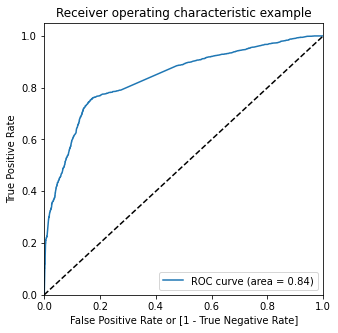

In [74]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)


#### Step 9: Finding Optimal Cutoff Point

In [75]:
# creating 10 points of probabilities to find the optimal point cutoff

numbers=[float(x)/10 for x in range(10)]  

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   
y_train_pred_final.head()  

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7263,1,0.214865,7263,1,1,1,0,0,0,0,0,0,0
6468,0,0.147880,6468,1,1,0,0,0,0,0,0,0,0
7833,1,0.133331,7833,1,1,0,0,0,0,0,0,0,0
4461,0,0.767006,4461,1,1,1,1,1,1,1,1,0,0
8453,0,0.214865,8453,1,1,1,0,0,0,0,0,0,0


#### Step 10: Calculate Accuracy, sensitivity and specificity with probability cutoffs


In [76]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs) 

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.382711    1.000000     0.000000
0.1          0.1  0.436688    0.992930     0.091826
0.2          0.2  0.645292    0.896430     0.489590
0.3          0.3  0.801001    0.756098     0.828841
0.4          0.4  0.803571    0.711559     0.860618
0.5          0.5  0.791531    0.644751     0.882533
0.6          0.6  0.773810    0.550725     0.912119
0.7          0.7  0.756494    0.453164     0.944554
0.8          0.8  0.730790    0.339343     0.973482
0.9          0.9  0.694805    0.212089     0.994083


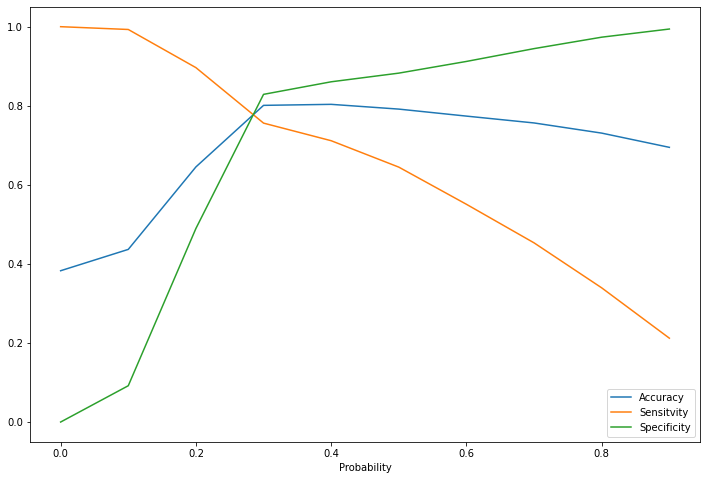

In [77]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'], figsize=(12,8))   # line plotting
plt.show()

In [78]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
7263,1,0.214865,7263,1,1,1,0,0,0,0,0,0,0,0
6468,0,0.147880,6468,1,1,0,0,0,0,0,0,0,0,0
7833,1,0.133331,7833,1,1,0,0,0,0,0,0,0,0,0
4461,0,0.767006,4461,1,1,1,1,1,1,1,1,0,0,1
8453,0,0.214865,8453,1,1,1,0,0,0,0,0,0,0,0


In [79]:
# Creating confusion matrix to find all the metrics

confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr_train

array([[3782,  781],
       [ 690, 2139]], dtype=int64)

In [80]:
#Sensitivity score
Sensitivity_train =round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)  

#specificity score
Specificity_train =round((confusion_pr_train[0,0]/(confusion_pr_train[0,0]+confusion_pr_train[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_train)  
print('Specificity:',Specificity_train) 

Sensitivity: 75.61
Specificity: 82.88


In [81]:
#  Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

#  Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 73.25
Recall: 75.61


In [82]:
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 80.1


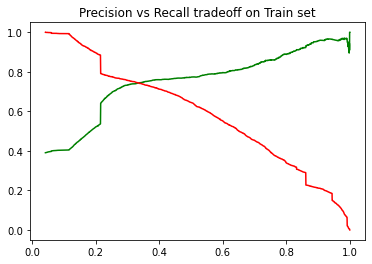

In [83]:
from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

#### Step 11: Prediction on the test dataset

In [84]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [85]:
# Took the same column train set has
test_cols=X_train_sm_9.columns[1:] 

In [86]:
# Updating it in the final test set and adding constant
X_test_final=X_test[test_cols]               
X_test_final=sm.add_constant(X_test_final)   
y_pred_test=logr9.predict(X_test_final)

In [87]:
# Created a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,0.507877,4269
2376,1,0.861107,2376
7766,1,0.727671,7766
9199,0,0.214865,9199
4359,1,0.861107,4359


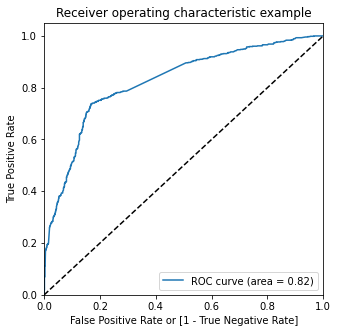

In [88]:
# Plotted Roc Curve
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

In [89]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.507877,4269,1
2376,1,0.861107,2376,1
7766,1,0.727671,7766,1
9199,0,0.214865,9199,0
4359,1,0.861107,4359,1


In [90]:
# Creating confusion matrix to find precision and recall score
confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[897, 219],
       [182, 550]], dtype=int64)

In [91]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  
print('Sensitivity:',Sensitivity_test)

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  
print('Specificity:',Specificity_test) 

Sensitivity: 75.14
Specificity: 80.38


In [92]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)
print('Precision:',Precision_test) 

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)
print('Recall:',Recall_test)     

Precision: 71.52
Recall: 75.14


In [93]:
# Checking test set accuracy
Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 78.3


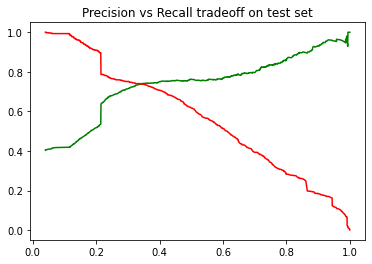

In [94]:
# Creating precision recall curve by crreating three points and plotting
p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
# Plotting precision
plt.plot(thresholds, p[:-1], "g-")    
# Plotting Recall
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

In [95]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  73.28447701532312


In [97]:
print('Train Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_train)   
print('Specificity:',Specificity_train)
print('Precision:',Precision_train) 
print('Recall:',Recall_train)
print('Accuracy:',Accuracy_train)
print()
print('Test Data Set metrics:')
print()
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test)
print('Precision:',Precision_test) 
print('Recall:',Recall_test)
print('Accuracy:',Accuracy_test)


Train Data Set metrics:

Sensitivity: 75.61
Specificity: 82.88
Precision: 73.25
Recall: 75.61
Accuracy: 80.1

Test Data Set metrics:

Sensitivity: 75.14
Specificity: 80.38
Precision: 71.52
Recall: 75.14
Accuracy: 78.3
